In [3]:
import sklearn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import sys
from sklearn.model_selection import train_test_split

In [4]:
file_path = 'E:\Sem6 Mini Project\ML\DynamicPricing\FinalDatasetDynamicPricing.csv'
data = pd.read_csv(file_path)
data.head()


,username,service_provider_username,service,price,no_of_pages,topic,date,deadline
0,user1,provider1,App,3500,6,Topic1,2024-03-04,2024-03-05
1,user2,provider2,PPT,575,17,Topic2,2024-03-25,2024-04-04
2,user3,provider3,Frontend,1975,16,Topic3,2024-03-27,2024-04-10
3,user4,provider4,Figma,800,4,Topic4,2024-03-19,2024-04-01
4,user5,provider5,Docs,200,12,Topic5,2024-03-13,2024-03-27


In [5]:
columns_to_keep = ['username', 'service_provider_username', 'service', 'price', 'no_of_pages', 'topic','date', 'deadline']
data = data[columns_to_keep].dropna()
data.head()



,username,service_provider_username,service,price,no_of_pages,topic,date,deadline
0,user1,provider1,App,3500,6,Topic1,2024-03-04,2024-03-05
1,user2,provider2,PPT,575,17,Topic2,2024-03-25,2024-04-04
2,user3,provider3,Frontend,1975,16,Topic3,2024-03-27,2024-04-10
3,user4,provider4,Figma,800,4,Topic4,2024-03-19,2024-04-01
4,user5,provider5,Docs,200,12,Topic5,2024-03-13,2024-03-27


In [6]:
y=data['price']
features=['service','no_of_pages','date','deadline']
X=data[features]
X.describe()

,no_of_pages
count,10000.000000
mean,8.872900
std,5.485486
min,1.000000
25%,4.000000
50%,7.000000
75%,13.000000
max,20.000000


In [7]:
data['date'] = pd.to_datetime(data['date'])
data['deadline'] = pd.to_datetime(data['deadline'])
data['days']=data['deadline']-data['date']



In [8]:
data.drop(['date','deadline'],axis=1,inplace=True)

In [9]:
data.drop(['username','service_provider_username'],axis=1,inplace=True)

In [10]:
data['days']=data['days'].dt.days
data.head()


,service,price,no_of_pages,topic,days
0,App,3500,6,Topic1,1
1,PPT,575,17,Topic2,10
2,Frontend,1975,16,Topic3,14
3,Figma,800,4,Topic4,13
4,Docs,200,12,Topic5,14


In [11]:
data.drop(['topic'],axis=1,inplace=True)

In [12]:
data

,service,price,no_of_pages,days
0,App,3500,6,1
1,PPT,575,17,10
2,Frontend,1975,16,14
3,Figma,800,4,13
4,Docs,200,12,14
...,...,...,...,...
9995,PPT,800,16,5
9996,Frontend,2000,1,8
9997,App,3025,7,11
9998,Figma,700,6,15


In [13]:
from sklearn.preprocessing import OrdinalEncoder
from sklearn.ensemble import RandomForestRegressor
y=data['price']
features=['service','no_of_pages','days']
X=data[features]
X.describe()
OrdinalEncoder=OrdinalEncoder()
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

lable_X_train=X_train.copy()
lable_X_test=X_test.copy()

lable_X_train[['service']]=OrdinalEncoder.fit_transform(X_train[['service']])
lable_X_test[['service']]=OrdinalEncoder.transform(X_test[['service']])

model=RandomForestRegressor(n_estimators=100,random_state=0)
print(lable_X_train)
print(lable_X_test)


      service  no_of_pages  days
631       0.0            3    15
8433      6.0            5     9
2050      2.0            9    14
1452      1.0            5     1
2052      1.0           13     9
...       ...          ...   ...
6045      4.0           10     1
6057      3.0           10    15
8751      2.0           12     5
4176      5.0           12     7
8723      6.0            6     4

[8000 rows x 3 columns]
      service  no_of_pages  days
7295      0.0            5    10
7070      3.0           20    15
4224      4.0            5    10
7916      5.0           18     4
4700      3.0           13     4
...       ...          ...   ...
9369      4.0           12    10
9549      1.0            2    10
6920      4.0            2     5
8798      0.0            3     5
2621      0.0            7     6

[2000 rows x 3 columns]


In [14]:
from sklearn.metrics import mean_absolute_error
def get_score(model,X_train,X_test,y_train,y_test):
    model.fit(X_train,y_train)
    preds=model.predict(X_test)
    return mean_absolute_error(y_test,preds)    

In [15]:
# get_score(model,lable_X_train,lable_X_test,y_train,y_test)

In [16]:
# from sklearn.metrics import mean_squared_error
# model.fit(lable_X_train,y_train)
# preds=model.predict(lable_X_test)

# accuracy=mean_squared_error(y_test,preds)
# accuracy

In [17]:
# from sklearn.metrics import r2_score
# r2=r2_score(y_test,preds)
# r2

In [18]:
# new_data = {
#     "service":0,
#     "no_of_pages":10,
#     "days":9,
# }

# input_data_as_numpy_array = np.array([
#     new_data["service"],new_data["no_of_pages"], new_data["days"]
# ]).reshape(1, -1)

# prediction = model.predict(input_data_as_numpy_array)
# print("Predicted Price:", prediction[0])


In [19]:
#import models
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import ExtraTreesRegressor

In [27]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

# Define the models
models = {
    # "LinearRegression": LinearRegression(),
    "RandomForestRegressor": RandomForestRegressor(),
    # "DecisionTreeRegressor": DecisionTreeRegressor(),
    # "SVR": SVR(),
    "KNeighborsRegressor": KNeighborsRegressor(),
    "GradientBoostingRegressor": GradientBoostingRegressor(),
    "AdaBoostRegressor": AdaBoostRegressor(),
    # "BaggingRegressor": BaggingRegressor(),
    # "ExtraTreesRegressor": ExtraTreesRegressor()
}

def fit_and_score(models, X_train, X_test, y_train, y_test):
    model_scores = {}
    model_metrics = {}
    
    for name, model in models.items():
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        r2_score = model.score(X_test, y_test)
        mse = mean_squared_error(y_test, y_pred)
        mae = mean_absolute_error(y_test, y_pred)
        rmse = np.sqrt(mse)
        
        model_scores[name] = r2_score
        model_metrics[name] = {
            "R2": r2_score,
            "MSE": mse,
            "MAE": mae,
            "RMSE": rmse
        }
        
    return model_scores, model_metrics

model_scores, model_metrics = fit_and_score(models=models, X_train=lable_X_train, X_test=lable_X_test, y_train=y_train, y_test=y_test)

model_scores
model_metrics


{'RandomForestRegressor': {'R2': 0.9999962824979556,
  'MSE': 3.47075,
  'MAE': 0.479,
  'RMSE': 1.8629949006908204},
 'KNeighborsRegressor': {'R2': 0.9476063166539951,
  'MSE': 48916.0125,
  'MAE': 94.3175,
  'RMSE': 221.16964642554365},
 'GradientBoostingRegressor': {'R2': 0.9986029178994964,
  'MSE': 1304.3497064417238,
  'MAE': 27.626709001797867,
  'RMSE': 36.11578195805435},
 'AdaBoostRegressor': {'R2': 0.9019520794679736,
  'MSE': 91539.91473877402,
  'MAE': 227.75518139288616,
  'RMSE': 302.55563907944935}}

In [28]:
from sklearn.metrics import confusion_matrix
import numpy as np
import pandas as pd

# Function to discretize the target variable
def discretize(y, bins):
    return np.digitize(y, bins)

# Function to fit and score models, including confusion matrices
def fit_and_score(models, X_train, X_test, y_train, y_test, bins):
    model_scores = {}
    model_metrics = {}
    confusion_matrices = {}
    
    # Discretize the target variable
    y_train_discretized = discretize(y_train, bins)
    y_test_discretized = discretize(y_test, bins)
    
    for name, model in models.items():
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        
        # Calculate regression metrics
        r2_score = model.score(X_test, y_test)
        mse = mean_squared_error(y_test, y_pred)
        mae = mean_absolute_error(y_test, y_pred)
        rmse = np.sqrt(mse)
        
        # Discretize predictions
        y_pred_discretized = discretize(y_pred, bins)
        
        # Create confusion matrix
        cm = confusion_matrix(y_test_discretized, y_pred_discretized)
        
        model_scores[name] = r2_score
        model_metrics[name] = {
            "R2": r2_score,
            "MSE": mse,
            "MAE": mae,
            "RMSE": rmse
        }
        confusion_matrices[name] = cm
        
    return model_scores, model_metrics, confusion_matrices

# Define the bins for discretizing the target variable
bins = np.linspace(min(y_train.min(), y_test.min()), max(y_train.max(), y_test.max()), 10)

# Assuming lable_X_train, lable_X_test, y_train, and y_test are defined
model_scores, model_metrics, confusion_matrices = fit_and_score(models=models, X_train=lable_X_train, X_test=lable_X_test, y_train=y_train, y_test=y_test, bins=bins)

# Display results
print("Model Scores:")
print(model_scores)
print("\nModel Metrics:")
print(pd.DataFrame(model_metrics))
print("\nConfusion Matrices:")
for model_name, cm in confusion_matrices.items():
    print(f"\n{model_name}:\n", cm)


Model Scores:
{'RandomForestRegressor': 0.9999968968042566, 'KNeighborsRegressor': 0.9476063166539951, 'GradientBoostingRegressor': 0.9986029178994964, 'AdaBoostRegressor': 0.8866108494881065}

Model Metrics:
      RandomForestRegressor  KNeighborsRegressor  GradientBoostingRegressor  \
R2                 0.999997             0.947606                   0.998603   
MSE                2.897219         48916.012500                1304.349706   
MAE                0.434375            94.317500                  27.626709   
RMSE               1.702122           221.169646                  36.115782   

      AdaBoostRegressor  
R2             0.886611  
MSE       105862.858833  
MAE          246.451032  
RMSE         325.365731  

Confusion Matrices:

RandomForestRegressor:
 [[415   0   0   0   0   0   0   0   0   0]
 [  0 233   0   0   0   0   0   0   0   0]
 [  0   0 126   0   0   0   0   0   0   0]
 [  0   0   0 135   0   0   0   0   0   0]
 [  0   0   0   0 222   0   0   0   0   0]
 [  

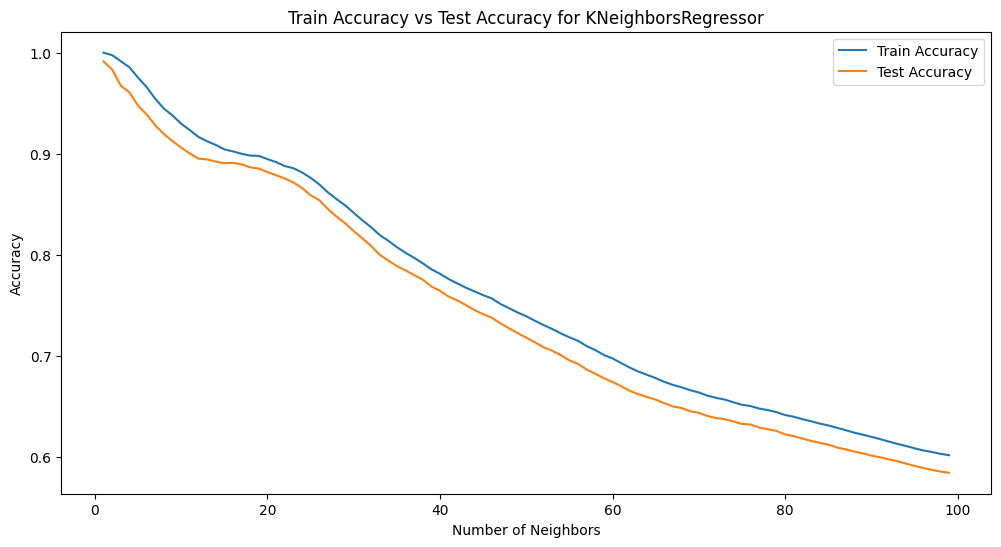

In [31]:
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsRegressor

# Assuming lable_X_train, lable_X_test, y_train, and y_test are defined

train_accuracy = []
test_accuracy = []

# Building the model with different k values
for k in range(1, 100):
    model = KNeighborsRegressor(n_neighbors=k)
    model.fit(lable_X_train, y_train)
    
    train_accuracy.append(model.score(lable_X_train, y_train))
    test_accuracy.append(model.score(lable_X_test, y_test))

# Plotting the train vs test accuracy
plt.figure(figsize=(12, 6))
plt.plot(range(1, 100), train_accuracy, label="Train Accuracy")
plt.plot(range(1, 100), test_accuracy, label="Test Accuracy")
plt.title("Train Accuracy vs Test Accuracy for KNeighborsRegressor")
plt.xlabel("Number of Neighbors")
plt.ylabel("Accuracy")
plt.legend()
plt.show()


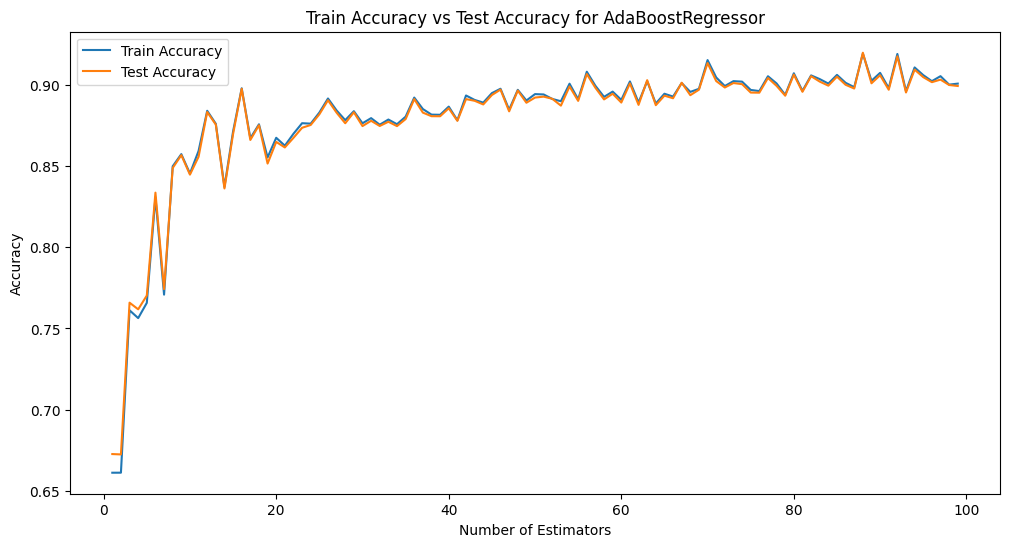

In [32]:
#for ada boost
#Train and Test Accuracy
from sklearn.ensemble import AdaBoostRegressor

# Assuming lable_X_train, lable_X_test, y_train, and y_test are defined

train_accuracy = []
test_accuracy = []

# Building the model with different n_estimators values
for n in range(1, 100):
    model = AdaBoostRegressor(n_estimators=n)
    model.fit(lable_X_train, y_train)
    
    train_accuracy.append(model.score(lable_X_train, y_train))
    test_accuracy.append(model.score(lable_X_test, y_test))

# Plotting the train vs test accuracy
plt.figure(figsize=(12, 6))
plt.plot(range(1, 100), train_accuracy, label="Train Accuracy")
plt.plot(range(1, 100), test_accuracy, label="Test Accuracy")
plt.title("Train Accuracy vs Test Accuracy for AdaBoostRegressor")
plt.xlabel("Number of Estimators")
plt.ylabel("Accuracy")
plt.legend()
plt.show()



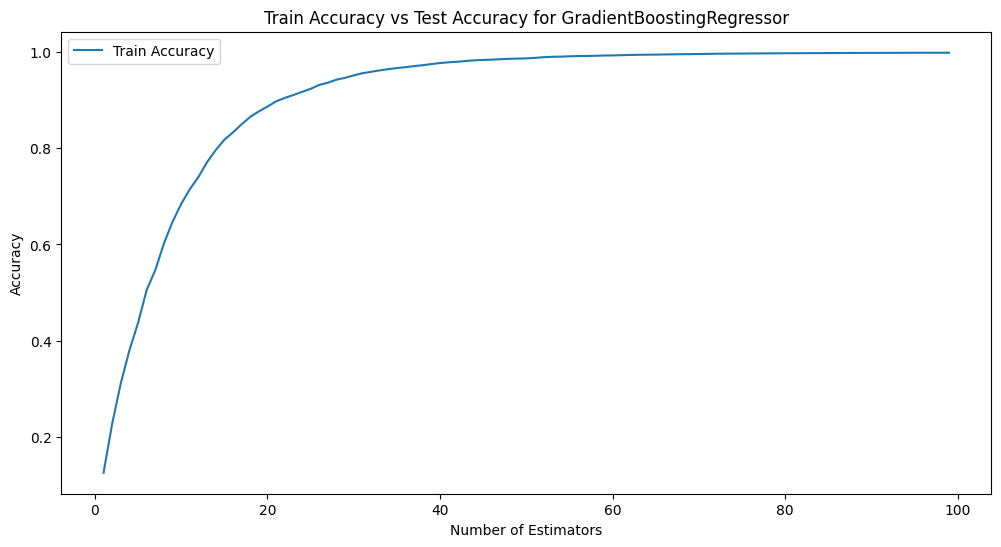

In [34]:
#Train and Test Accuracy for Gradient Boosting
from sklearn.ensemble import GradientBoostingRegressor

# Assuming lable_X_train, lable_X_test, y_train, and y_test are defined

train_accuracy = []
test_accuracy = []

# Building the model with different n_estimators values
for n in range(1, 100):
    model = GradientBoostingRegressor(n_estimators=n)
    model.fit(lable_X_train, y_train)
    
    train_accuracy.append(model.score(lable_X_train, y_train))
    test_accuracy.append(model.score(lable_X_test, y_test))

# Plotting the train vs test accuracy
plt.figure(figsize=(12, 6))
plt.plot(range(1, 100), train_accuracy, label="Train Accuracy")
plt.plot(range(1, 100), test_accuracy, label="Test Accuracy")
plt.title("Train Accuracy vs Test Accuracy for GradientBoostingRegressor")
plt.xlabel("Number of Estimators")
plt.ylabel("Accuracy")
plt.legend()
plt.show()



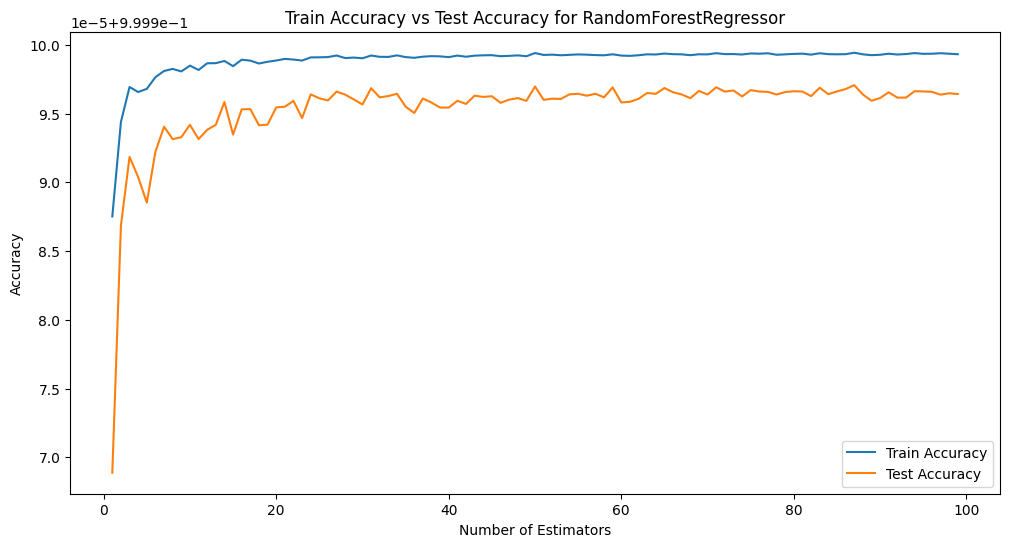

In [35]:
#Train and Test Accuracy for Random Forest
from sklearn.ensemble import RandomForestRegressor

# Assuming lable_X_train, lable_X_test, y_train, and y_test are defined

train_accuracy = []
test_accuracy = []

# Building the model with different n_estimators values

for n in range(1, 100):
    model = RandomForestRegressor(n_estimators=n)
    model.fit(lable_X_train, y_train)
    
    train_accuracy.append(model.score(lable_X_train, y_train))
    test_accuracy.append(model.score(lable_X_test, y_test))

# Plotting the train vs test accuracy
plt.figure(figsize=(12, 6))
plt.plot(range(1, 100), train_accuracy, label="Train Accuracy")
plt.plot(range(1, 100), test_accuracy, label="Test Accuracy")
plt.title("Train Accuracy vs Test Accuracy for RandomForestRegressor")
plt.xlabel("Number of Estimators")
plt.ylabel("Accuracy")
plt.legend()
plt.show()


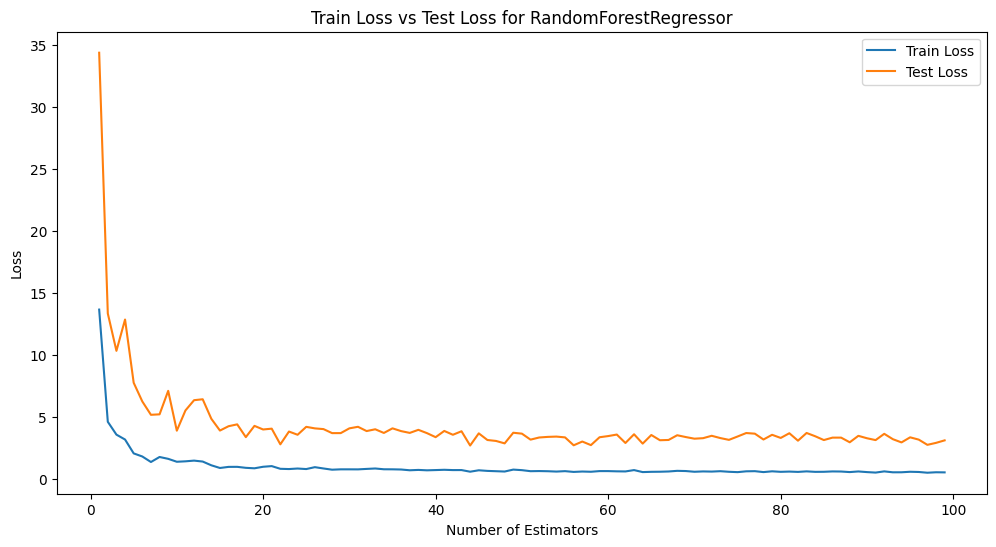

In [37]:
#Model loss for Random Forest
from sklearn.ensemble import RandomForestRegressor

# Assuming lable_X_train, lable_X_test, y_train, and y_test are defined

train_loss = []
test_loss = []

# Building the model with different n_estimators values
for n in range(1, 100):
    model = RandomForestRegressor(n_estimators=n)
    model.fit(lable_X_train, y_train)
    
    train_loss.append(mean_squared_error(y_train, model.predict(lable_X_train)))
    test_loss.append(mean_squared_error(y_test, model.predict(lable_X_test)))

# Plotting the train vs test loss
plt.figure(figsize=(12, 6))
plt.plot(range(1, 100), train_loss, label="Train Loss")
plt.plot(range(1, 100), test_loss, label="Test Loss")
plt.title("Train Loss vs Test Loss for RandomForestRegressor")
plt.xlabel("Number of Estimators")
plt.ylabel("Loss")
plt.legend()    
plt.show()





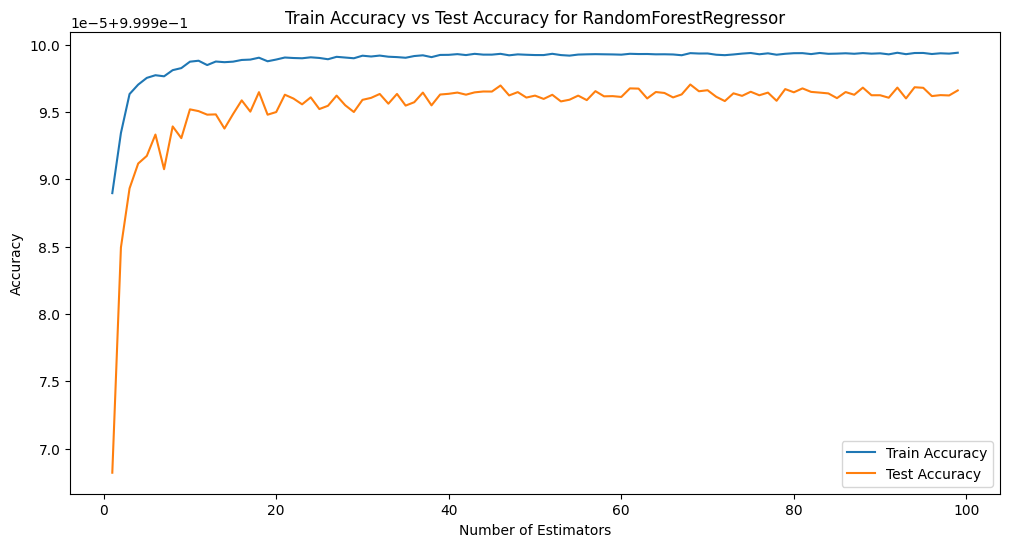

In [38]:
#Train and Test Accuracy for Random Forest using epochs

from sklearn.ensemble import RandomForestRegressor

# Assuming lable_X_train, lable_X_test, y_train, and y_test are defined

train_accuracy = []
test_accuracy = []

# Building the model with different n_estimators values
for n in range(1, 100):
    model = RandomForestRegressor(n_estimators=n)
    model.fit(lable_X_train, y_train)
    
    train_accuracy.append(model.score(lable_X_train, y_train))
    test_accuracy.append(model.score(lable_X_test, y_test))

# Plotting the train vs test accuracy
plt.figure(figsize=(12, 6))
plt.plot(range(1, 100), train_accuracy, label="Train Accuracy")
plt.plot(range(1, 100), test_accuracy, label="Test Accuracy")
plt.title("Train Accuracy vs Test Accuracy for RandomForestRegressor")
plt.xlabel("Number of Estimators")
plt.ylabel("Accuracy")
plt.legend()
plt.show()


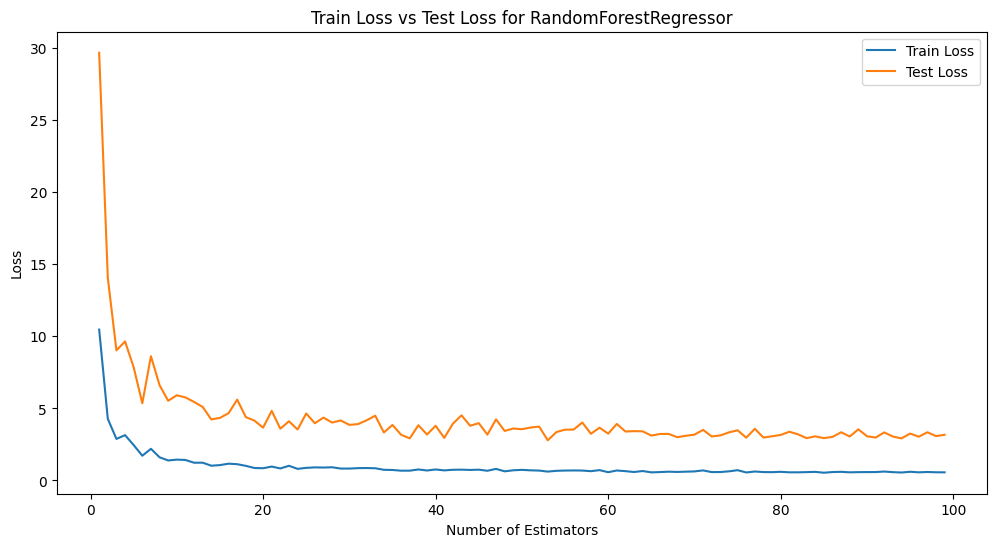

In [39]:
#Model loss for Random Forest using epochs
from sklearn.ensemble import RandomForestRegressor

# Assuming lable_X_train, lable_X_test, y_train, and y_test are defined

train_loss = []
test_loss = []

# Building the model with different n_estimators values
for n in range(1, 100):
    model = RandomForestRegressor(n_estimators=n)
    model.fit(lable_X_train, y_train)
    
    train_loss.append(mean_squared_error(y_train, model.predict(lable_X_train)))
    test_loss.append(mean_squared_error(y_test, model.predict(lable_X_test)))

# Plotting the train vs test loss
plt.figure(figsize=(12, 6))
plt.plot(range(1, 100), train_loss, label="Train Loss")
plt.plot(range(1, 100), test_loss, label="Test Loss")
plt.title("Train Loss vs Test Loss for RandomForestRegressor")
plt.xlabel("Number of Estimators")
plt.ylabel("Loss")
plt.legend()
plt.show()



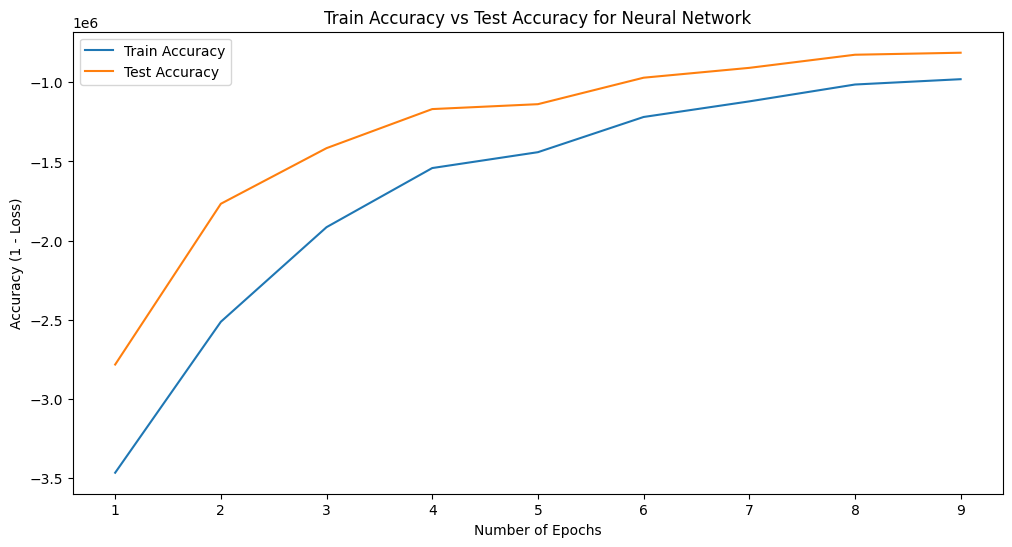

In [41]:
# import numpy as np
# import matplotlib.pyplot as plt
# from keras.models import Sequential
# from keras.layers import Dense
# from keras.optimizers import Adam
# from sklearn.preprocessing import StandardScaler

# # Assuming lable_X_train, lable_X_test, y_train, and y_test are defined

# # Normalize the data
# scaler = StandardScaler()
# lable_X_train = scaler.fit_transform(lable_X_train)
# lable_X_test = scaler.transform(lable_X_test)

# # Initialize lists to store accuracies
# train_accuracy = []
# test_accuracy = []

# # Define the number of epochs to test
# epoch_values = range(1, 10)

# # Build and compile the model function
# def build_model():
#     model = Sequential()
#     model.add(Dense(64, activation='relu', input_dim=lable_X_train.shape[1]))
#     model.add(Dense(64, activation='relu'))
#     model.add(Dense(1))
#     model.compile(optimizer=Adam(), loss='mean_squared_error', metrics=['mae'])
#     return model

# # Train and evaluate the model for different numbers of epochs
# for epochs in epoch_values:
#     model = build_model()
#     history = model.fit(lable_X_train, y_train, epochs=epochs, batch_size=32, verbose=0, validation_data=(lable_X_test, y_test))
    
#     train_accuracy.append(1 - np.mean(history.history['loss']))  # Use 1 - loss as a proxy for accuracy
#     test_accuracy.append(1 - np.mean(history.history['val_loss']))  # Use 1 - val_loss as a proxy for accuracy

# # Plotting the train vs test accuracy
# plt.figure(figsize=(12, 6))
# plt.plot(epoch_values, train_accuracy, label="Train Accuracy")
# plt.plot(epoch_values, test_accuracy, label="Test Accuracy")
# plt.title("Train Accuracy vs Test Accuracy for Neural Network")
# plt.xlabel("Number of Epochs")
# plt.ylabel("Accuracy (1 - Loss)")
# plt.legend()
# plt.show()


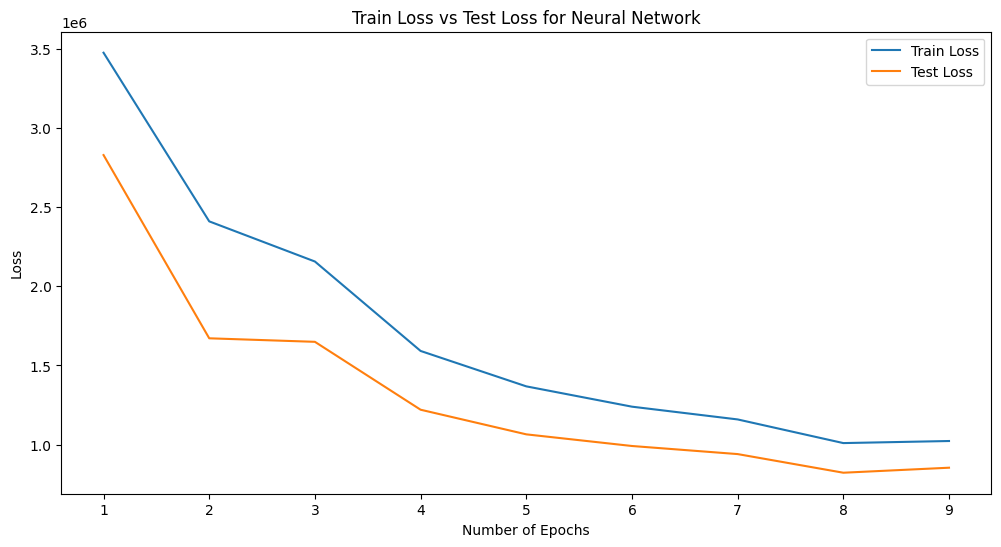

In [42]:
# #Model loss for Neural Network
# import numpy as np
# import matplotlib.pyplot as plt
# from keras.models import Sequential
# from keras.layers import Dense
# from keras.optimizers import Adam
# from sklearn.preprocessing import StandardScaler

# # Assuming lable_X_train, lable_X_test, y_train, and y_test are defined

# # Normalize the data
# scaler = StandardScaler()
# lable_X_train = scaler.fit_transform(lable_X_train)
# lable_X_test = scaler.transform(lable_X_test)

# # Initialize lists to store losses
# train_loss = []
# test_loss = []

# # Define the number of epochs to test
# epoch_values = range(1, 10)

# # Build and compile the model function
# def build_model():
#     model = Sequential()
#     model.add(Dense(64, activation='relu', input_dim=lable_X_train.shape[1]))
#     model.add(Dense(64, activation='relu'))
#     model.add(Dense(1))
#     model.compile(optimizer=Adam(), loss='mean_squared_error', metrics=['mae'])
#     return model

# # Train and evaluate the model for different numbers of epochs
# for epochs in epoch_values:
#     model = build_model()
#     history = model.fit(lable_X_train, y_train, epochs=epochs, batch_size=32, verbose=0, validation_data=(lable_X_test, y_test))
    
#     train_loss.append(np.mean(history.history['loss']))
#     test_loss.append(np.mean(history.history['val_loss']))

# # Plotting the train vs test loss
# plt.figure(figsize=(12, 6))
# plt.plot(epoch_values, train_loss, label="Train Loss")
# plt.plot(epoch_values, test_loss, label="Test Loss")
# plt.title("Train Loss vs Test Loss for Neural Network")
# plt.xlabel("Number of Epochs")
# plt.ylabel("Loss")
# plt.legend()
# plt.show()


Epoch 1/20
250/250 [==============================] - 2s 4ms/step - loss: 3439317.2500 - mae: 1595.0823 - val_loss: 2695739.7500 - val_mae: 1374.0239
Epoch 2/20
250/250 [==============================] - 0s 2ms/step - loss: 1465941.0000 - mae: 1007.1305 - val_loss: 765935.5625 - val_mae: 776.4716
Epoch 3/20
250/250 [==============================] - 0s 2ms/step - loss: 679187.3125 - mae: 724.9268 - val_loss: 658531.7500 - val_mae: 715.3201
Epoch 4/20
250/250 [==============================] - 0s 2ms/step - loss: 614714.1875 - mae: 686.3751 - val_loss: 605661.2500 - val_mae: 688.1453
Epoch 5/20
250/250 [==============================] - 0s 2ms/step - loss: 563759.3750 - mae: 654.0695 - val_loss: 554051.0625 - val_mae: 643.9796
Epoch 6/20
250/250 [==============================] - 0s 2ms/step - loss: 518262.1250 - mae: 617.4781 - val_loss: 512084.0625 - val_mae: 611.1921
Epoch 7/20
250/250 [==============================] - 0s 2ms/step - loss: 482144.3125 - mae: 584.8499 - val_loss: 4790

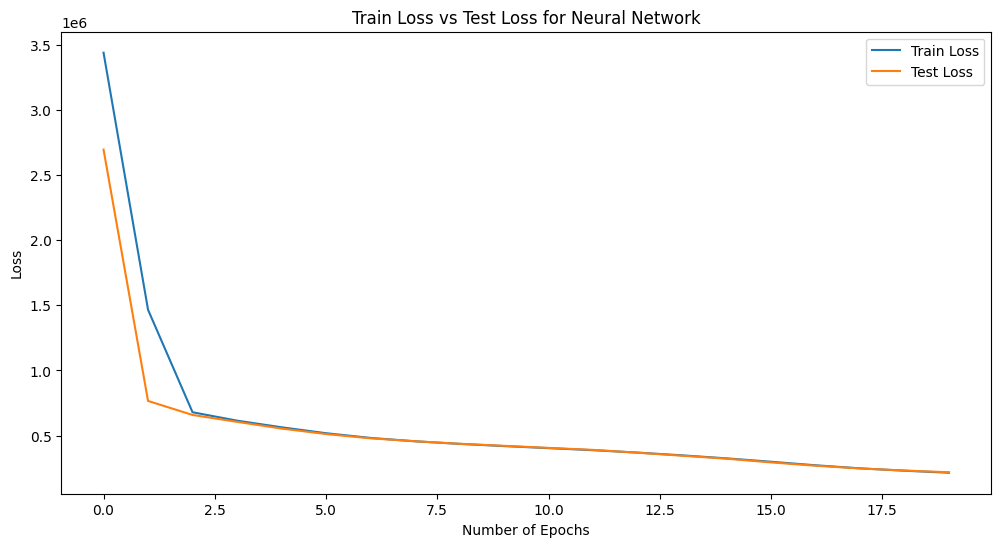

Model: "sequential_20"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_60 (Dense)            (None, 64)                256       
                                                                 
 dense_61 (Dense)            (None, 64)                4160      
                                                                 
 dense_62 (Dense)            (None, 1)                 65        
                                                                 
Total params: 4,481
Trainable params: 4,481
Non-trainable params: 0
_________________________________________________________________


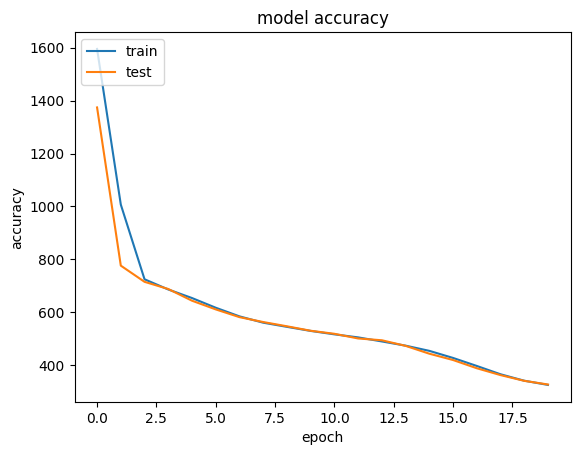

In [45]:
# #Neural Network
# from keras.models import Sequential
# from keras.layers import Dense
# from keras.optimizers import Adam
# from sklearn.preprocessing import StandardScaler

# # Assuming lable_X_train, lable_X_test, y_train, and y_test are defined

# # Normalize the data
# scaler = StandardScaler()
# lable_X_train = scaler.fit_transform(lable_X_train)
# lable_X_test = scaler.transform(lable_X_test)

# # Build the model
# model = Sequential()
# model.add(Dense(64, activation='relu', input_dim=lable_X_train.shape[1]))
# model.add(Dense(64, activation='relu'))
# model.add(Dense(1))
# model.compile(optimizer=Adam(), loss='mean_squared_error', metrics=['mae'])

# # Train the model
# history = model.fit(lable_X_train, y_train, epochs=20, batch_size=32, verbose=1, validation_data=(lable_X_test, y_test))

# # Evaluate the model
# loss, mae = model.evaluate(lable_X_test, y_test)
# # print(f"Mean Absolute Error: {mae}")

# # Print the mean absolute error
# print(f"Mean Absolute Error: {mae}")

# # Plot the training history
# plt.figure(figsize=(12, 6))
# plt.plot(history.history['loss'], label='Train Loss')
# plt.plot(history.history['val_loss'], label='Test Loss')
# plt.title("Train Loss vs Test Loss for Neural Network")
# plt.xlabel("Number of Epochs")
# plt.ylabel("Loss")
# plt.legend()
# plt.show()

# #print the model summary
# model.summary()

# #plot accuracy of train and test data
# plt.plot(history.history['mae'])
# plt.plot(history.history['val_mae'])
# plt.title('model accuracy')
# plt.ylabel('accuracy')
# plt.xlabel('epoch')
# plt.legend(['train', 'test'], loc='upper left')
# plt.show()


